# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##### Observations
1. The southern hemisphere has a warmer climate than the northern hemispehere. 
2. Latitude does not seem to have any influence on the speed of the wind. The northern and southern hemispheres' data shows that the wind speeds vary throughout.
3. Latitude does not seem to have an influence on cloudiness, for the same reason as the previous observation.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [38]:
## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=3))

{
   "coord": {
      "lon": -39.25,
      "lat": -17.71
   },
   "weather": [
      {
         "id": 800,
         "main": "Clear",
         "description": "clear sky",
         "icon": "01n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 68.85,
      "feels_like": 71.55,
      "temp_min": 68.85,
      "temp_max": 68.85,
      "pressure": 1019,
      "humidity": 87,
      "sea_level": 1019,
      "grnd_level": 1018
   },
   "visibility": 10000,
   "wind": {
      "speed": 4.45,
      "deg": 73
   },
   "clouds": {
      "all": 4
   },
   "dt": 1595310342,
   "sys": {
      "country": "BR",
      "sunrise": 1595322404,
      "sunset": 1595362786
   },
   "timezone": -10800,
   "id": 3466980,
   "name": "Caravelas",
   "cod": 200
}


In [41]:
# Get weather data
names = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

count = 1
next_record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
    
        # append data into empty sets
        names.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
    
        # conditional for records and sets
        if count <= 50:
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1 
        
        else: 
            count = 0
            next_record += 1
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1
    except: 
        print("City not found. Skipping...")
        pass
        

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------") 

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Laas
Processing Record 2 of Set 1 | Thompson
Processing Record 3 of Set 1 | Chapais
Processing Record 4 of Set 1 | Kapaa
Processing Record 5 of Set 1 | Carnarvon
Processing Record 6 of Set 1 | Ponta do Sol
Processing Record 7 of Set 1 | Avarua
Processing Record 8 of Set 1 | High Level
Processing Record 9 of Set 1 | Vaini
Processing Record 10 of Set 1 | Ilulissat
Processing Record 11 of Set 1 | Pisco
Processing Record 12 of Set 1 | Clyde River
Processing Record 13 of Set 1 | East London
Processing Record 14 of Set 1 | Barrow
Processing Record 15 of Set 1 | Pangody
City not found. Skipping...
Processing Record 16 of Set 1 | Tebingtinggi
Processing Record 17 of Set 1 | Puerto Ayora
Processing Record 18 of Set 1 | Tuktoyaktuk
City not found. Skipping...
Processing Record 19 of Set 1 | Dikson
Processing Record 20 of Set 1 | Kamenka
Processing Record 21 of Set 1 | Yangi Marg`ilon
Processing Record 22 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Convert raw data into dictionary
weather_dict = {
    "City": names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
# convert dict into df
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [43]:
weather_df.to_csv("weather_df", encoding="utf-8", index=False)

In [44]:
weather_df.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laas,46.62,10.70,53.60,93,20,1.03,IT,1595310893
1,Thompson,55.74,-97.86,57.20,93,75,2.68,CA,1595310322
2,Chapais,49.78,-74.85,53.60,87,75,6.93,CA,1595310413
3,Kapaa,22.08,-159.32,80.60,69,75,18.34,US,1595310339
4,Carnarvon,-24.87,113.63,78.80,31,0,8.05,AU,1595310357
...,...,...,...,...,...,...,...,...,...
95,Vengerovo,55.68,76.75,62.26,72,61,12.08,RU,1595310905
96,Puerto Escondido,15.85,-97.07,81.19,81,100,6.55,MX,1595310905
97,Cabo San Lucas,22.89,-109.91,87.01,45,7,11.07,MX,1595310286
98,Lüderitz,-26.65,15.16,62.60,34,0,8.05,NA,1595310905


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
heavy_humid = len(weather_df.loc[(weather_df["Humidity"] > 100)])
heavy_humid
# we can skip this step and move onto the plotting

0

In [46]:
#  Get the indices of cities that have humidity over 100%.


In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [48]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

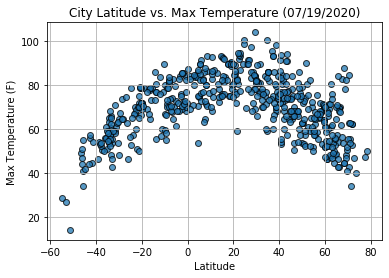

In [49]:
# making a scatter plot of lat vs max temp
plt.title("City Latitude vs. Max Temperature (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_MaxTemp.png")

In [50]:
print(f"This plot shows the relationship between the proximity of the equator and the temp. The closer you are to the equator, the hotter it gets.")

This plot shows the relationship between the proximity of the equator and the temp. The closer you are to the equator, the hotter it gets.


## Latitude vs. Humidity Plot

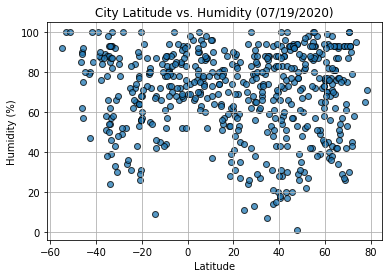

In [51]:
# making a scatter plot of lat vs humidity
plt.title("City Latitude vs. Humidity (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Humidity.png")

In [52]:
print(f"This plot shows the relationship between the proximity of the equator and the humidity. The closer you are to the equator, the more humid it gets.")

This plot shows the relationship between the proximity of the equator and the humidity. The closer you are to the equator, the more humid it gets.


## Latitude vs. Cloudiness Plot

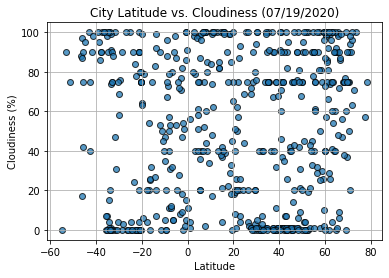

In [53]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Cloudiness (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Cloudiness.png")

In [54]:
print(f"This plot shows the relationship between the proximity of the equator and the percentage of cloudiness. The southern hemisphere is not as cloudy as the northern hemispher.")

This plot shows the relationship between the proximity of the equator and the percentage of cloudiness. The southern hemisphere is not as cloudy as the northern hemispher.


## Latitude vs. Wind Speed Plot

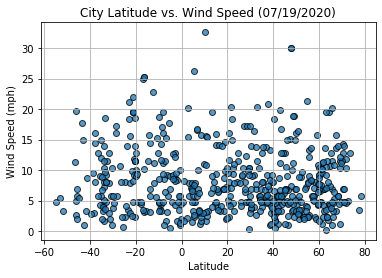

In [55]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Wind Speed (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Wind.png")

In [56]:
print(f"This plot shows the relationship between the proximity of the equator and the wind speed. There does not seem to be a relationship between the two.")

This plot shows the relationship between the proximity of the equator and the wind speed. There does not seem to be a relationship between the two.


## Linear Regression

In [57]:
# OPTIONAL: Create a function to create Linear Regression plots

In [58]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[weather_df["Lat"]>.01]
south = weather_df.loc[weather_df["Lat"]<-.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.63616545142982


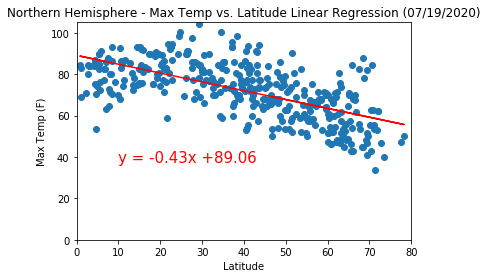

In [59]:
# making a scatter plot of northern hemi - max temp vs latitude
north_x_val = north["Lat"]
north_y_val = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(0,105)
plt.xlim(0, 80)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(10,37.5),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Max_Temp_Vs_Lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7734823556518693


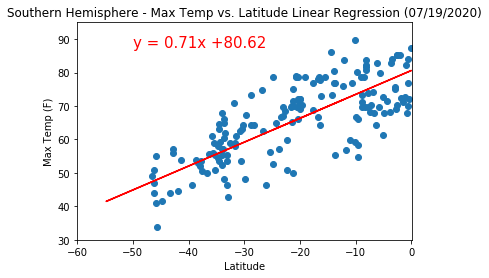

In [60]:
# making a scatter plot of southern hemi - max temp vs latitude
south_x_val = south["Lat"]
south_y_val = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(30,95)
plt.xlim(-60, .1)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-50,87.5),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Max_Temp_Vs_Lat.png")

In [61]:
print(f"The two regression models are not similar, as one is a positive relationship (the southern hemispher) and one is not (northen hemisphere). ")

The two regression models are not similar, as one is a positive relationship (the southern hemispher) and one is not (northen hemisphere). 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.036399819968252874


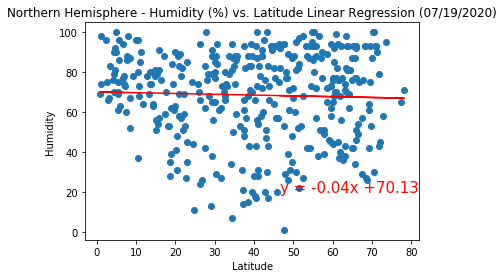

In [62]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,20),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Humid_Vs_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.023175398342856472


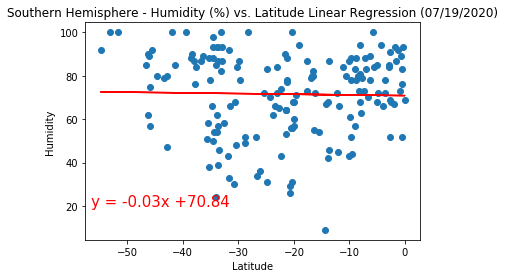

In [63]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-56.5,20),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Humid_Vs_Lat.png")

In [64]:
print(f"These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. ")

These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06511848611453251


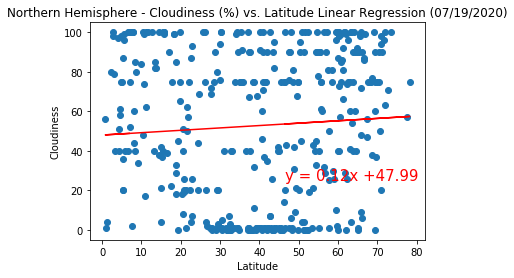

In [65]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,25),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Cloudiness_Vs_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.152907368881737


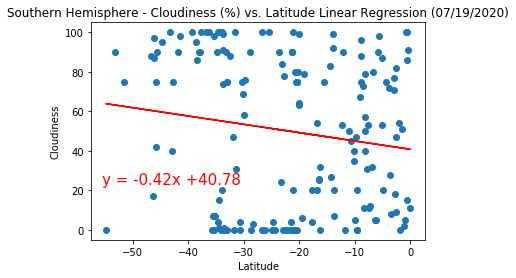

In [66]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.ylim(0,105)
# plt.xlim(100, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-55.5,23),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Cloudiness_Vs_Lat.png")

In [67]:
print(f"These two regression lines are a bit similar as they are both negative.")

These two regression lines are a bit similar as they are both negative.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.030039205042113465


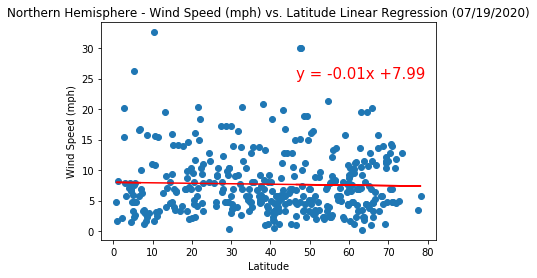

In [68]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,25),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Wind_Speed_Vs_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.042096193023920224


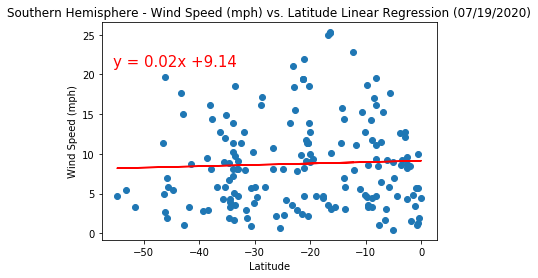

In [69]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.ylim(0,105)
# plt.xlim(100, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-55.5,21),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Wind_Speed_Vs_Lat.png")

In [70]:
print(f"These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. ")

These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. 
